In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
file_path = os.path.join('owid-covid-data.csv')

In [3]:
Covid_df=pd.read_csv(file_path)
Covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
# from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
impCategorical = SimpleImputer(missing_values=np.nan, 
                               strategy='most_frequent')

In [6]:
Covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
# Delete unused columns
reduced_df=Covid_df.drop(columns=['tests_units','iso_code', 'continent', 'location', 'date','new_cases_smoothed', 'total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million'])
reduced_df

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions_per_million,weekly_hosp_admissions,new_tests,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,36289.0,18.0,1487.0,2.0,0.59,NaN,NaN,NaN,NaN,1764.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74440,36321.0,32.0,1489.0,2.0,0.59,NaN,NaN,NaN,NaN,2056.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74441,36341.0,20.0,1489.0,0.0,0.59,NaN,NaN,NaN,NaN,2164.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74442,36377.0,36.0,1492.0,3.0,NaN,NaN,NaN,NaN,NaN,1706.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [8]:
# data_imputed = impNumeric.fit(reduced_df).transform(reduced_df)

In [9]:
Covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [10]:
# calculate cases per capita, then add to the columns on the dataframe
cases_per_capita = Covid_df["population"]/Covid_df["total_cases"]
Covid_df["cases_per_capita"] = cases_per_capita

Covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_per_capita
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.095711e+02
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.092103e+02
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.089851e+02
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.085803e+02


In [11]:
# icu_per_capita = Covid_df["population"]/Covid_df["icu_patients"]
# Covid_df["icu_per_capita"] = icu_per_capita

# Covid_df['icu_per_capita'].unique()

In [12]:
# Remove unused columns
reduced_df=Covid_df.drop(columns=['new_cases_smoothed', 'total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million'])
reduced_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_per_capita
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,1487.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.095711e+02
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,1489.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.092103e+02
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,1489.0,0.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.089851e+02
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,1492.0,3.0,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.085803e+02


In [13]:
# num_countries= Covid_df['iso_code'].nunique()
# country_code=[]
# country_code.append(Covid_df['iso_code'].unique())
# country_code
# for i in num_countries:
#     country[i] = Covid_df.loc[Covid_df["iso_code"] == country_code[i]]
#     print(country, country_code)

In [14]:
# reduced_df.columns
# #reduced_df['icu_patients'].nunique
# reduced_df['hosp_patients'].unique()

In [15]:
reduced_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_per_capita
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,1487.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.095711e+02
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,1489.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.092103e+02
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,1489.0,0.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.089851e+02
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,1492.0,3.0,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.085803e+02


In [16]:
# # Replace all Nan with 0
# df=reduced_df.fillna(0)
# df

In [17]:
reduced_df.dtypes

iso_code                              object
continent                             object
location                              object
date                                  object
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
reproduction_rate                    float64
icu_patients                         float64
hosp_patients                        float64
weekly_icu_admissions_per_million    float64
weekly_hosp_admissions               float64
new_tests                            float64
total_tests                          float64
positive_rate                        float64
tests_per_case                       float64
tests_units                           object
total_vaccinations                   float64
people_vaccinated                    float64
people_fully_vaccinated              float64
new_vaccinations                     float64
stringency

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [19]:
# reduced_df.columns

In [20]:
COV_GDP_df=reduced_df[['iso_code','gdp_per_capita', 'population', 'total_cases','new_cases', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations', 'stringency_index', 'cases_per_capita']]
COV_GDP_df

,iso_code,gdp_per_capita,population,total_cases,new_cases,new_deaths,icu_patients,hosp_patients,new_tests,new_vaccinations,stringency_index,cases_per_capita
0,AFG,1803.987,38928341.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
1,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
2,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
3,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
4,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,1899.775,14862927.0,36289.0,18.0,2.0,NaN,NaN,1764.0,3278.0,35.19,4.095711e+02
74440,ZWE,1899.775,14862927.0,36321.0,32.0,2.0,NaN,NaN,2056.0,243.0,NaN,4.092103e+02
74441,ZWE,1899.775,14862927.0,36341.0,20.0,0.0,NaN,NaN,2164.0,140.0,NaN,4.089851e+02
74442,ZWE,1899.775,14862927.0,36377.0,36.0,3.0,NaN,NaN,1706.0,118.0,NaN,4.085803e+02


In [21]:
# # Create new DataFrames that look into the countries details
# AFG_df = COV_GDP_df.loc[COV_GDP_df["iso_code"] == "AFG"]
# AFG_df

In [22]:
# COV_GDP_df['iso_code'].unique()

In [23]:
# Check remaining countries after removing Nans data
COV_GDP_df=COV_GDP_df.dropna()
COV_GDP_df['iso_code'].unique()

array(['AUT', 'BEL', 'BGR', 'CAN', 'CZE', 'DNK', 'EST', 'FIN', 'FRA',
       'IRL', 'ISR', 'ITA', 'LUX', 'PRT', 'SVN', 'GBR', 'USA'],
      dtype=object)

In [24]:
# X = COV_GDP_df[['new_cases', 'cases_per_capita', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations', 'stringency_index', 'cases_per_capita']]
# y= COV_GDP_df[["gdp_per_capita"]].values.reshape(-1,1)

X = COV_GDP_df[['cases_per_capita', 'stringency_index', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations']]
y= COV_GDP_df[["gdp_per_capita"]].values.reshape(-1,1)

In [25]:
# Test for the assumptions of linear regression
# 1. Linaerity
# plt.scatter(COV_GDP_df['new_cases'], y)

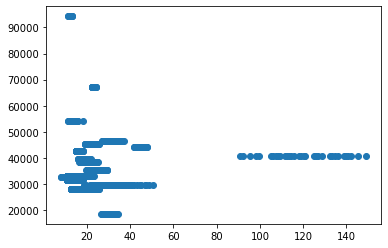

In [26]:
plt.scatter(COV_GDP_df['cases_per_capita'], y)

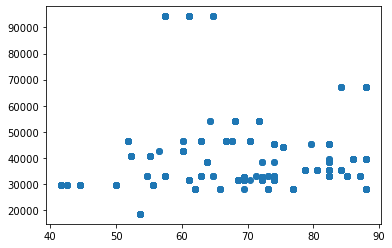

In [27]:
plt.scatter(COV_GDP_df['stringency_index'], y)

In [28]:
# plt.scatter(COV_GDP_df['new_vaccinations'], y)

In [29]:
# plt.scatter(COV_GDP_df['new_tests'], y)

In [30]:
# plt.scatter(COV_GDP_df['hosp_patients'], y)

In [31]:
# plt.scatter(COV_GDP_df['new_deaths'], y)

In [32]:
# plt.scatter(COV_GDP_df['icu_patients'], y)

In [33]:
# COV_GDP_df.corr()['gdp_per_capita']

In [34]:
# COV_GDP_df.corr()['cases_per_capita']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
X_train.shape

(732, 7)

In [37]:
y_train.shape

(732, 1)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score=model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(training_score, test_score)

0.1120641571694394 0.08530700467371011


In [39]:
# Predict y_test values with X_test
predictions = model.predict(X_test)
predictions.shape

(244, 1)

In [40]:
# Find r2 and mse
mse = mean_squared_error(y_test, predictions)
r2=r2_score(y_test,predictions)
print(r2, mse)

NameError: name 'mean_squared_error' is not defined

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
# print(y_test, predictions)

In [ ]:
# Plot the real and predicted values on the scatter plot & line graph
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# plt.scatter(y_test, predictions, c='crimson')
# # plt.yscale('log')
# # plt.xscale('log')

# p1 = max(max(predictions), max(y_test))
# p2 = min(min(predictions), min(y_test))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=15)
# plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
# plt.show()

In [ ]:
# Another Linear regression technique

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)
# print(predictions)[0:5]

In [ ]:
lm.score(X_test,y_test)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
# plt.xticks()
# plt.yticks()
# plt.axis('equal')
plt.show()

In [ ]:
predictions = lm.predict(X)

In [ ]:
error = predictions-y_test
error

In [ ]:
model.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y, predictions, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predictions), max(y))
p2 = min(min(predictions), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
X = COV_GDP_df[['cases_per_capita', 'stringency_index', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations']]
y= COV_GDP_df[["gdp_per_capita"]].values.reshape(-1,1)

In [ ]:
# USING OLS TECHNIQUE (statsmodels)

In [ ]:
from statsmodels.regression import linear_model

In [ ]:
x= sm.add_constant(X_train)

In [ ]:
x

In [ ]:
olsr_results = linear_model.OLS(y_train, x).fit()
print('Training completed')

print(olsr_results.summary())

In [ ]:
# There is indication of strong multicollinearity. Calculate VIF 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# For each X, calculate VIF and save in dataframe
# VIF>10 indicates presence of significant multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

In [ ]:
# Remove features with VIF > 0, then rerun the model
x_2 = x [['const','cases_per_capita', 'stringency_index', 'new_tests', 'new_vaccinations']]
x_2

In [ ]:
olsr_results = linear_model.OLS(y_train, x_2).fit()
print('Training completed')

print(olsr_results.summary())

In [ ]:
# For each X, calculate VIF and save in dataframe
# VIF>10 indicates presence of significant multicollinearity
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(x_2.values, i) for i in range(x_2.shape[1])]
vif_2["Features"] = x_2.columns
vif_2

In [ ]:
# Let's finally test against our validation dataset

In [ ]:
x_3 = sm.add_constant(X_test) # adding a constant
x_4 = x_3[[ 'const','stringency_index', 'new_tests', 'new_tests','new_vaccinations']] 
x_4

In [ ]:
# Compute predictions
olsr_predictions = olsr_results.get_prediction(x_4)
olsr_predictions

In [ ]:
prediction_summary_frame = olsr_predictions.summary_frame()
print(prediction_summary_frame)

In [ ]:
y_pred = prediction_summary_frame['mean']
y_pred

In [ ]:
plt.scatter(y_test, y_pred, c='red', label = 'Testing Data')
# plt.plot(y_test, y_pred, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
# plt.xticks()
# plt.yticks()
# plt.axis('equal')
plt.show()

# PLEASE IGNORE THE CODES FROM HERE DOWNWARDS AT THE MOMENT

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.show()

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, color='red')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
print(model.coef_, model.intercept_)

In [ ]:
# get importance
importance = model.coef_
importance

In [ ]:
X_train.columns

In [ ]:
predictions = model.predict(X_test)
predictions.shape

In [ ]:
# Plot a line chart of real y_test values and the predictions
plt.plot(y_test, predictions)
# plt.legend()
plt.show()

In [ ]:
# plot feature importance
plt.bar[importance]
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2=r2_score(y_test,predictions)

In [ ]:
r2

In [ ]:
mse

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

In [ ]:
X_train_scaled_dataframe = pd.DataFrame(X_train_scaled)
X_train_scaled_dataframe

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
training_score=model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(training_score, test_score)

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)

In [ ]:
from fancyimpute import MICE

In [ ]:
# Using OLS method for the Linear regression model

In [ ]:
import statsmodels.api as sm
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

In [ ]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
sm.add_constant(X)
# Print out the statistics
model.summary()

In [ ]:
plt.scatter(y_test, predictions)
plt.show()

In [ ]:
pip install stepwise-regression

In [44]:

COV_GDP_df.to_csv('COV_GDPdata.csv')